<a href="https://colab.research.google.com/github/harmalh/HAWK-ML-DL/blob/master/5_Logistische_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Sitzung 5: Logistische Regression**

## 1. Import grundlegender Packages und des Datensatzes

In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.


Zunächst müssen alle für die Datenverarbeitung sowie explorative Datenanalyse notwendigen Packages importiert werden. Pandas dient der Datenverarbeitung, numpy der Arbeit mit Arrays und matplotlib sowie seaborn der Datenvisualisierung.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Als nächstes importieren wir unseren Datensatz. Dabei handelt es sich um Daten zu Transaktionen europäischer Kreditkarteninhaber aus dem Jahr 2013. Unser target in diesem Datensatz bildet eine binäre Variable (Class), die angibt, ob es sich um eine reguläre Transaktion oder um Betrug handelt. Der Datensatz enhält insgesamt 30 mögliche erklärende Variablen von denen jedoch nur zwei (Time und Amount) näher beschrieben sind. Die übrigen Variablen (V1-V28) sind durch eine Hauptkomponentenanalyse (siehe nächste Sitzung) transformiert worden und es liegen aus Vertraulichkeitsgründen keine weiteren Informationen zu den Variablen vor. Dennoch bietet der Datensatz die Möglichkeit das Vorgehen bei einer logistischen Regression mit Python zu veranschaulichen. Der Datensatz kann unter folgendem Link heruntergeladen werden:

https://www.kaggle.com/mlg-ulb/creditcardfraud

Für eine vereinfachte weitere Analyse speichern wir unseren DataFrame in  "df". Da das feature "Time" für unsere Analyse unbrauchbar ist, entfernen wir es aus dem Datensatz.

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv')

In [8]:
df.drop('Time', axis = 1, inplace = True)

In [9]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## 2. Datenbereinigung und explorative Datenanalyse

Um uns als erstes einen Überblick über die Daten zu verschaffen nutzen wir die .info()-Funktion welche uns alle Variablen auflistet und detaillierte Informationen zu fehlenden Werten und Datentypen bietet. Unser Datensatz hat keine fehlenden Werte und enthält neben unserem target als interger ausschließlich floats.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In den meisten Fällen enthalten Datensätze jedoch fehlende Werte. Die Anzahl an fehlenden Werten könnt ihr euch mit dem folgenden Code anzeigen lassen. Solltet ihr in einem Datensatz fehlende Werte vorfinden, so gibt es verschiedene Möglichkeiten damit umzugehen. Eine davon haben wir bereits letzte Woche angewendet. Dort haben wir alle features mit fehlenden Werten aus dem Datensatz entfernt.

In [11]:
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Mit der .head()-Funktion können wir einen geneaueren Blick auf die Daten werfen. Als Default werden uns die ersten fünf Beobachtungen des Datensatzes angezeigt. Sollen mehr oder weniger Beobachtungen aufgelistet werden, können wir das innerhalb der Klammer spezifizieren.

In [12]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Teil eines jeden Projekts im Bereich maschinellen Lernens ist die explorative Datenanalyse. Daher wollen wir auch dieses Mal einige deskriptive Analysen durchführen, bevor wir uns der logistischen Regression widmen. Unser target ist die binäre Variable "y", welches angibt, ob es sich um eine reguläre oder betrügerische Transaktion handelt. Daher wollen wir zunächst untersuchen, wie unser target über den Datensatz verteilt ist. Mit Hilfe der eckigen Klammern nach dem DataFrame (df) können wir uns auf eine bestimmte Spalte des DataFrames beziehen.

In [14]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Wir können nun sehen, dass es sich bei der Mehrheit der Transaktionen (284315) in unserem Datensatz um reguläre Transaktionen handelt. Bei 492 Transaktionen dagegen handelt es sich um Betrug. Einen wichtigen Teil bei der explorativen Datenanalyse bildet die Visualisierung der Daten. Aus diesem Grund erstellen wir als nächstes eine Grafik, die die Verteilung von "y" nochmal anschaulicher darstellt.

<Axes: xlabel='Class', ylabel='count'>

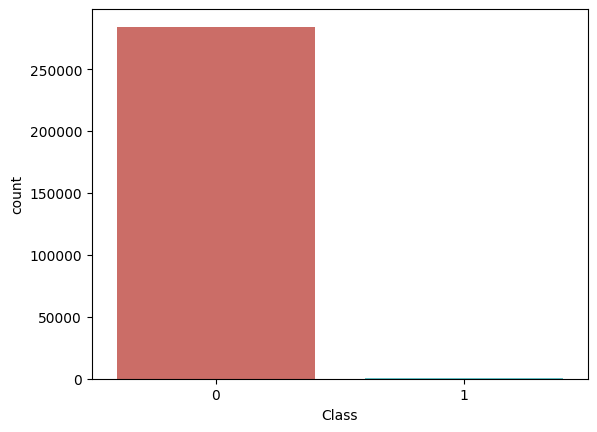

In [15]:
sns.countplot(x='Class', data=df, palette = 'hls')

Als nächstes schauen wir uns das einzig verbleibende feature an, zu dem wir detailliertere Informationen vorliegen haben. Das feature "Amount" enthält Informationen zur Höhe der jeweiligen Transaktion. Im ersten Schritt untersuchen wir inwieweit die Höhe der Transaktion zwischen regulären und betrügerischen Transaktionen variiert. Dazu fassen wir zunächst jeweils die regulären und betrügerischen Transaktionen in Teilstichproben zusammen.

In [16]:
nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

Anschließend betrachten wir die deskriptiven Statistiken der beiden Teilstichproben.

In [17]:
nonfraud_cases.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [18]:
fraud_cases.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [19]:
df['V1'].describe()

count    2.848070e+05
mean     1.759061e-12
std      1.958696e+00
min     -5.640751e+01
25%     -9.203734e-01
50%      1.810880e-02
75%      1.315642e+00
max      2.454930e+00
Name: V1, dtype: float64

Die deskriptiven Statistiken zeigen, dass die Werte der Variable "Amount" im Vergleich zu den anderen Variablen stark variieren (deutlich größerer Mittelwert und Standardabweichung als beispielsweise bei "V1"). Um den Wertebereich der Variable zu reduzieren normalisieren wir die Variable mit der Funktion StandardScaler aus sklearn. Die Funktion transformiert die Variable so, dass die Standardabweichung auf 1 reduziert wird.

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
amount = df['Amount'].values
df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

Wenn wir nun erneut die Werte der Variabe "Amount" anschauen, wird deutlich, dass der Wertebereich nun dem der übrigen Variablen ähnelt (siehe Übersicht zum Datensatz oben). Mit der .describe()-Funktion sehen wir außerdem, dass die Standardabweichung nun tatsächlich gleich 1 ist.

In [21]:
df['Amount'].head(10)

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64

In [22]:
df['Amount'].describe()

count    2.848070e+05
mean     2.913952e-17
std      1.000002e+00
min     -3.532294e-01
25%     -3.308401e-01
50%     -2.652715e-01
75%     -4.471707e-02
max      1.023622e+02
Name: Amount, dtype: float64

## 3. Implementierung der logistischen Regression

An dieser Stelle schließen wir nun die Datenbereinigung und explorative Datenanalyse ab und widmen uns der Durchführung einer logistischen Regression. Dafür müssen wir zunächst das target und die features definieren. "X" repräsentiert unsere features, zu denen alle Variablen bis auf unser target gehören. Unser target bildet die Variable "Class", welche wir in y speichern.

In [23]:
X = df.drop('Class', axis = 1).values
y = df['Class'].values

In [24]:
y

array([0, 0, 0, ..., 0, 0, 0])

In der letzten Sitzung zur linearen Regression haben wir das Modell auf unseren gesamten Datensatz angewendet. In der Regel werden Algorithmen im Bereich maschinelles Lernen jedoch dazu genutzt, Vorhersagen für neue Beobachtungen zu treffen. Daher wird in der Regel ein Datensatz in zwei Teile geteilt. Den ersten bildet ein Trainingsdatensatz, der dazu genutzt wird das Modell zu trainieren. Der zweite Teil wird dann als Testdatensatz verwendet, um die Vorhersagegenauigkeit des Modells zu überprüfen. Dieses wollen wir nun auch mit unseren Daten machen und teilen dafür zunächst den Datensatz.

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Nun wollen wir unser Modell auf den Trainingsdatensatz anwenden. Dafür importieren wir zunächst die Funktion LogisticRegression aus der sklearn-library und speichern sie für die weitere Arbeit in logreg.

In [26]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

Nachdem wir das Modell mit Hilfe der .fit() auf den Trainigsdatensatz trainiert haben nutzen wir als nächstes den Testdatensatz, um auf Basis der features Vorhersagen über das target zu treffen. Im Anschluss werden diese Vorhersagen mit den tatsächlichen Werten des targets aus dem Testdatensatz verglichen, um die Leistungsfähigkeit des Modells zu evaluieren.

In [27]:
logreg_yhat = logreg.predict(X_test)

## 4. Evaluierung des Modells

Eine der grundlegensten Evaluierungsmetriken bildet der Accuracy Score. Diese Metrik ergibt sich aus der Anzahl korrekt getätigter Vorhersagen geteilt durch die Gesamtanzahl an Vorhersagen.

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, logreg_yhat)

0.9991924440855307

Der Accuracy Score unseres Modells beträgt 0.999. Dieses deutet auf eine hohe Genauigkeit des Modells hin. Nichtsdestotrotz muss dieser Accuracy Score insbesondere bei Daten, bei denen die Beobachtungen ungleich auf die Ausprägungen des targets verteilt sind mit Vorsicht betrachtet werden. Dies ist auch bei unserem Datensatz der Fall, bei dem deutlich mehr reguläre als betrügerische Transaktionen vorliegen. Selbst ein Modell, welches immer reguläre Transaktionen vorhersagt hätte bei dem hier betrachteten Datensatz einen Accuracy Score von 99,83%, da dies dem Anteil regulärer Transaktionen entspricht. Aus diesem Grund werden häufig weitere Evaluierungsmetriken verwendet, um die Leistungsfähigkeit eines Modell zu bewerten und mit anderen Modellen zu vergleichen. Eine weitere weit verbreitete Evaluierungsmetrik wäre der F1 Score. Der F1 score ist ebenfalls Teil der sklearn library.